#Домашнее задание#


Прочитать про методы оптимизации для нейронных сетей https://habr.com/post/318970/

Реализовать самостоятельно логистическую регрессию
Обучить ее методом градиентного спуска

Методом nesterov momentum

Методом rmsprop

В качестве dataset'а взять Iris, оставив 2 класса:

Iris Versicolor

Iris Virginica


In [1]:
from sklearn import datasets
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from jupyterthemes import jtplot
jtplot.style()

In [2]:
iris = datasets.load_iris()

In [3]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [5]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
X = []
Y = []
for idx, item in enumerate(iris.target):
    if item != 0:
        X.append(iris.data[idx])
        Y.append(item-1)

X = np.asarray(X)
Y = np.asarray(Y)
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [7]:
X.shape

(100, 4)

In [8]:
# Классифицирующая функция, пропущенная через сигмоиду
def predict(theta, X):
    predict = theta[0] + theta[1] * X[:, 0] + theta[2] * X[:, 1] + theta[3] * X[:, 2] + theta[4] * X[:, 3]
    sigm = 1. / (1 + np.exp(-predict))
    return sigm

In [77]:
theta = np.random.normal(size=(5,))


In [78]:
theta

array([ 1.1839814 , -1.47311806, -0.60101283, -0.00983331, -0.20787984])

In [79]:
# Простой градиент
# Количество эпох и лернинг рейт требуют настройки, случайные начальные занчения могут сильно влиять на результат
# Может повезти и ошибок будет 5-6, а может и не повезти и ошибок будет большинство
lr = 0.1
theta = []
#theta = np.random.normal(size=(5,))
theta = [ 1.1839814 , -1.47311806, -0.60101283, -0.00983331, -0.20787984 ]
print(theta)
grad_loss_hist = []
for _ in range(50):
    sigm = predict(theta, X)
    theta[0] -= lr * np.sum(sigm - Y)/len(sigm)
    theta[1] -= lr * np.sum((sigm - Y) * X[:, 0])/len(sigm)
    theta[2] -= lr * np.sum((sigm - Y) * X[:, 1])/len(sigm)
    theta[3] -= lr * np.sum((sigm - Y) * X[:, 2])/len(sigm)
    theta[4] -= lr * np.sum((sigm - Y) * X[:, 3])/len(sigm)
    loss = - np.mean(np.log(sigm) * Y + np.log(1 - sigm) * (1 - Y))
    print(theta)
    grad_loss_hist.append(loss)

[1.1839814, -1.47311806, -0.60101283, -0.00983331, -0.20787984]
[1.2339742791874138, -1.143758089055987, -0.45233147462872303, 0.26773672560953987, -0.10658966779801088]
[1.283690062426399, -0.8160208718680027, -0.30440397399432867, 0.5440523950855289, -0.005721221786255032]
[1.321749137161485, -0.5598654860135626, -0.18943401366824758, 0.7635046482938947, 0.07560794698086547]
[1.2966022910969262, -0.7026340590360898, -0.2570413078395166, 0.6677188378926256, 0.04868566181643916]
[1.3081966073935907, -0.6130683438788066, -0.21830119394078756, 0.7542805955559824, 0.08415645698021415]
[1.2922335463106045, -0.698035944514064, -0.25939834313311116, 0.7032714936345582, 0.07243434643665875]
[1.298333889882489, -0.6433755180700862, -0.23659812558398352, 0.7619859922576561, 0.09827617318337958]
[1.286639731704165, -0.7014661624725441, -0.265370723197434, 0.7318179400959357, 0.09362265138578749]
[1.2895638621431391, -0.6670413317603439, -0.2518055738035788, 0.7743517325529691, 0.1138548482753630

In [80]:
X[:, 2]

array([4.7, 4.5, 4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. ,
       4.7, 3.6, 4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4,
       4.8, 5. , 4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1,
       4. , 4.4, 4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1,
       5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1,
       5.3, 5.5, 6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9,
       5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6,
       5.1, 5.1, 5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

In [81]:
X[:, 1]

array([3.2, 3.2, 3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2. , 3. , 2.2,
       2.9, 2.9, 3.1, 3. , 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3. ,
       2.8, 3. , 2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3. , 3.4, 3.1, 2.3, 3. ,
       2.5, 2.6, 3. , 2.6, 2.3, 2.7, 3. , 2.9, 2.9, 2.5, 2.8, 3.3, 2.7,
       3. , 2.9, 3. , 3. , 2.5, 2.9, 2.5, 3.6, 3.2, 2.7, 3. , 2.5, 2.8,
       3.2, 3. , 3.8, 2.6, 2.2, 3.2, 2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3. ,
       2.8, 3. , 2.8, 3.8, 2.8, 2.8, 2.6, 3. , 3.4, 3.1, 3. , 3.1, 3.1,
       3.1, 2.7, 3.2, 3.3, 3. , 2.5, 3. , 3.4, 3. ])

In [82]:
X[:, 0]

array([7. , 6.4, 6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. ,
       6.1, 5.6, 6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6,
       6.8, 6.7, 6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6,
       5.5, 5.5, 6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8,
       7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8,
       6.4, 6.5, 7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1,
       6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7,
       6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

In [83]:
grad_loss_hist

[5.3921170290525815,
 3.1907553947551976,
 1.1222818723573535,
 0.7036286636290846,
 0.6375818707224973,
 0.6187849318381979,
 0.6022361372507279,
 0.5936008535389969,
 0.5857685303408422,
 0.5804329906218704,
 0.5755809590552589,
 0.5716904354413443,
 0.5680964468986247,
 0.5649149662961055,
 0.5619097698054509,
 0.5590969824070816,
 0.5563884076348367,
 0.5537782215538288,
 0.551232041978202,
 0.5487426156723003,
 0.5462959804078754,
 0.5438872614527103,
 0.5415105521473913,
 0.5391630773066525,
 0.5368422137414751,
 0.5345464580076729,
 0.5322745566329263,
 0.5300256722037778,
 0.5277991300898879,
 0.5255944154122547,
 0.5234110997203285,
 0.5212488176174802,
 0.5191072462888209,
 0.5169860887352845,
 0.5148850688158191,
 0.512803921839606,
 0.5107423939767334,
 0.5087002373958918,
 0.5066772107031161,
 0.5046730764967252,
 0.5026876018817312,
 0.5007205572418469,
 0.49877171661163267,
 0.4968408570503922,
 0.4949277588662781,
 0.4930322052873945,
 0.4911539825789503,
 0.48929287986

In [84]:
# Смотрим, сколько допостили ошибок при классификации
err = 0
for idx, item in enumerate(np.around(predict(theta, X))):
    if item != Y[idx]:
        err += 1
err

9

In [85]:
# Сравниваем результаты классификации
np.matrix([np.around(predict(theta, X)), Y]).T

matrix([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [1., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [1., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [1., 0.],
        [0., 0.],
        [1., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [1., 0.],
        [1., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [1., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1

In [86]:
predict(theta, X)

array([0.25587719, 0.3364    , 0.34113441, 0.48487654, 0.38295768,
       0.51972062, 0.41032803, 0.38785136, 0.33030981, 0.49269794,
       0.46455691, 0.38941001, 0.34963076, 0.48067772, 0.29307149,
       0.25476103, 0.54238553, 0.36569774, 0.49307819, 0.38971546,
       0.56536148, 0.29746945, 0.54658207, 0.47003636, 0.29869773,
       0.28241237, 0.35862642, 0.44475374, 0.4595342 , 0.2531792 ,
       0.39660453, 0.3598375 , 0.33497841, 0.6562437 , 0.58883662,
       0.4136251 , 0.33336854, 0.40867708, 0.40929598, 0.4618223 ,
       0.55087124, 0.4413826 , 0.37109355, 0.37643472, 0.47099382,
       0.40276364, 0.42476184, 0.33977461, 0.27224134, 0.40878648,
       0.81656188, 0.72495714, 0.64229127, 0.71485752, 0.7475201 ,
       0.71015584, 0.75993769, 0.68067864, 0.72103967, 0.6490854 ,
       0.53000789, 0.65147185, 0.60377689, 0.74814975, 0.75863942,
       0.6392504 , 0.63914638, 0.64290339, 0.80398339, 0.67291604,
       0.6334392 , 0.71761283, 0.7234322 , 0.55669319, 0.64589

In [110]:
# nesterov momentum
lr = 0.01
theta = []
#theta = np.random.normal(size=(5,))
theta = [1.1839814 , -1.47311806, -0.60101283, -0.00983331, -0.20787984]
vel_pred = np.zeros(5)
vel = np.zeros(5)
print(theta)
nest_loss_hist = []
gamma = 0.975
for _ in range(50):
    sigm = predict(theta, X)
    loss = - np.mean(np.log(sigm) * Y + np.log(1 - sigm) * (1 - Y))
    nest_loss_hist.append(loss)
    
    sigm = predict(theta - gamma * vel_pred, X)
    
    vel[0] = (gamma * vel_pred[0] + lr * np.sum(sigm - Y))/len(sigm)
    vel[1] = (gamma * vel_pred[1] + lr * np.sum((sigm - Y) * X[:, 0]))/len(sigm)
    vel[2] = (gamma * vel_pred[2] + lr * np.sum((sigm - Y) * X[:, 1]))/len(sigm)
    vel[3] = (gamma * vel_pred[3] + lr * np.sum((sigm - Y) * X[:, 2]))/len(sigm)
    vel[4] = (gamma * vel_pred[4] + lr * np.sum((sigm - Y) * X[:, 3]))/len(sigm)
    theta -= vel
    print(theta)

    vel_pred = vel

[1.1839814, -1.47311806, -0.60101283, -0.00983331, -0.20787984]
[ 1.18898069 -1.44018206 -0.58614469  0.01792369 -0.19775082]
[ 1.19402798 -1.40692917 -0.57113357  0.04594812 -0.18752411]
[ 1.19907508 -1.37367694 -0.55612279  0.07397231 -0.17729739]
[ 1.20412124 -1.34043014 -0.54111453  0.10199235 -0.16707205]
[ 1.20916602 -1.30719131 -0.52611     0.13000628 -0.15684874]
[ 1.21420879 -1.27396416 -0.51111089  0.15801124 -0.14662844]
[ 1.21924862 -1.24075413 -0.49611973  0.18600302 -0.13641256]
[ 1.22428416 -1.20756923 -0.48114026  0.21397537 -0.12620321]
[ 1.22931342 -1.17442126 -0.46617793  0.24191908 -0.1160035 ]
[ 1.23433348 -1.1413276  -0.45124081  0.26982057 -0.10581807]
[ 1.23934009 -1.10831378 -0.43634071  0.29765977 -0.09565373]
[ 1.24432701 -1.07541727 -0.42149498  0.32540721 -0.08552054]
[ 1.24928522 -1.04269265 -0.40672883  0.35301977 -0.07543324]
[ 1.25420176 -1.01021875 -0.39207868  0.38043503 -0.06541323]
[ 1.25905825 -0.97810781 -0.37759627  0.4075639  -0.05549111]
[ 1.26

In [111]:
nest_loss_hist

[5.3921170290525815,
 5.171734087238824,
 4.9492435346177475,
 4.726776762506228,
 4.504374660197738,
 4.282067397563012,
 4.059899022781507,
 3.8379343348177417,
 3.6162687274617618,
 3.3950426405065497,
 3.17446264392521,
 2.9548318755665015,
 2.7365932326429534,
 2.520388981512546,
 2.307139362775692,
 2.098138468879803,
 1.8951551474664012,
 1.7005067275965713,
 1.5170449441672054,
 1.3479713360335344,
 1.1964205581445433,
 1.0648544303429355,
 0.9544711579660741,
 0.8649131868496928,
 0.7944233083793003,
 0.7403392435507754,
 0.6996686326311188,
 0.6695381460165953,
 0.6474476540222986,
 0.6313593969127616,
 0.6196843681312835,
 0.6112202402433181,
 0.6050756702230775,
 0.6005989011698567,
 0.5973177179155329,
 0.5948920416422248,
 0.5930778983837709,
 0.5917006778344114,
 0.5906355874685209,
 0.5897935051788851,
 0.5891108031064811,
 0.5885420564260503,
 0.5880548314395901,
 0.5876259649106051,
 0.5872389096771355,
 0.5868818413683627,
 0.5865463079101513,
 0.5862262659923413,
 0

In [112]:
# Смотрим, сколько допостили ошибок при классификации
err = 0
for idx, item in enumerate(np.around(predict(theta, X))):
    if item != Y[idx]:
        err += 1
err

17

In [106]:
# RMSProp
lr = 0.05
theta = []
#theta = np.random.normal(size=(5,))
theta = [1.1839814 , -1.47311806, -0.60101283, -0.00983331, -0.20787984]
e_sq_grad = np.zeros(5)
grad = np.zeros(5)
print(theta)
rmsp_loss_hist = []
gamma = 0.975
eps = 0.00000001
for _ in range(50):
    sigm = predict(theta, X)
    loss = - np.mean(np.log(sigm) * Y + np.log(1 - sigm) * (1 - Y))
    rmsp_loss_hist.append(loss)
    grad[0] = np.sum(sigm - Y)/len(sigm)
    grad[1] = np.sum((sigm - Y) * X[:, 0])/len(sigm)
    grad[2] = np.sum((sigm - Y) * X[:, 1])/len(sigm)
    grad[3] = np.sum((sigm - Y) * X[:, 2])/len(sigm)
    grad[4] = np.sum((sigm - Y) * X[:, 3])/len(sigm)
    
    e_sq_grad = gamma * e_sq_grad + (1 - gamma)  * grad ** 2
    
    theta -= lr * grad / np.sqrt(e_sq_grad + eps)
    print(theta)

[1.1839814, -1.47311806, -0.60101283, -0.00983331, -0.20787984]
[ 1.50020891 -1.1568903  -0.28478509  0.30639445  0.10834786]
[ 1.72322359 -0.93366831 -0.06162361  0.52974776  0.33180912]
[ 1.83210589 -0.81901147  0.05079489  0.64890775  0.4545614 ]
[ 1.75503412 -0.88216598 -0.01748877  0.60189051  0.42138989]
[ 1.7716072  -0.855103    0.00551707  0.63904892  0.46682315]
[ 1.73577398 -0.87849048 -0.0226033   0.6290877   0.46822068]
[ 1.73157319 -0.87127241 -0.01978447  0.64777691  0.49637078]
[ 1.70760819 -0.88309758 -0.03626455  0.64873455  0.50802349]
[ 1.69621233 -0.88269372 -0.040407    0.66117874  0.53039302]
[ 1.67639472 -0.89039002 -0.05276975  0.66612318  0.54582351]
[ 1.6621466  -0.8926197  -0.0596372   0.67623601  0.56607782]
[ 1.64388566 -0.89868712 -0.07041235  0.68283142  0.58310226]
[ 1.62834633 -0.90204543 -0.07848081  0.69201892  0.60255192]
[ 1.61067489 -0.90742014 -0.08861501  0.69938923  0.62035046]
[ 1.59445919 -0.91131438 -0.09728427  0.70820359  0.63950681]
[ 1.57

In [107]:
rmsp_loss_hist

[5.3921170290525815,
 2.5328793359800024,
 0.7882476700230913,
 0.6313385531687414,
 0.5923980258994663,
 0.5809086181533187,
 0.5743009429678007,
 0.5696362510482578,
 0.5655548291363168,
 0.5617140145782167,
 0.5579642496236507,
 0.5542582753757769,
 0.550574811504627,
 0.5469066609207378,
 0.5432502990125005,
 0.5396048031957481,
 0.5359696828973471,
 0.5323451259881528,
 0.528731269456979,
 0.5251285075577627,
 0.5215371297506818,
 0.5179575593443349,
 0.5143901248176753,
 0.5108352411959085,
 0.5072932427391376,
 0.5037645285552241,
 0.5002494264873042,
 0.49674831886067655,
 0.4932615214182159,
 0.4897894006069147,
 0.4863322567760371,
 0.48289044234001766,
 0.479464240132737,
 0.476053991908167,
 0.4726599621558583,
 0.4692824890025721,
 0.4659218212065669,
 0.4625783102492536,
 0.45925220372324405,
 0.45594391361633724,
 0.45265374497223104,
 0.44938231950529106,
 0.446130228393376,
 0.4428988355434587,
 0.4396899422645226,
 0.43650777551327763,
 0.43335930371870224,
 0.4302609

In [108]:
# Смотрим, сколько допостили ошибок при классификации
err = 0
for idx, item in enumerate(np.around(predict(theta, X))):
    if item != Y[idx]:
        err += 1
err

7

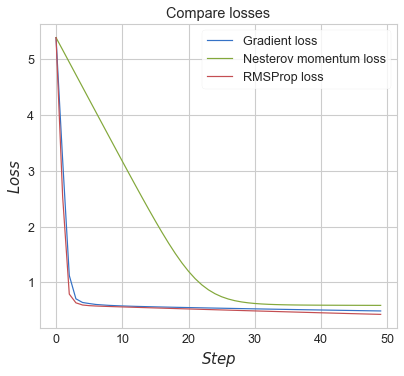

In [113]:
# Сравним скорость убывания ошибки
plt.plot(range(50), grad_loss_hist, label='Gradient loss' )
plt.plot(range(50), nest_loss_hist, label='Nesterov momentum loss' )
plt.plot(range(50), rmsp_loss_hist, label='RMSProp loss' )
plt.title('Compare losses')
plt.xlabel('$Step$', fontsize=15)
plt.ylabel('$Loss$', fontsize=15)
plt.legend()
plt.show()